In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import factorial
import scipy.stats as stats
import math
%matplotlib inline

In [3]:
data = pd.read_csv('estimations.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
data.head()
data['dw'] = data['dw']

Text(0, 0.5, 'Frequency')

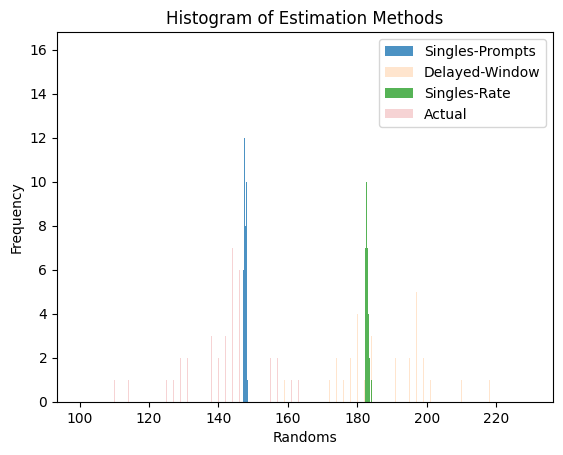

In [ ]:
bins = np.arange(100, 230, 5)
plt.hist(data['sp'], bins=bins, alpha = 0.8)
plt.hist(data['dw'], bins=bins, alpha = 0.2)
plt.hist(data['sr'], bins=bins, alpha = 0.8)
plt.hist(data['actual'], bins=bins, alpha = 0.2)
plt.legend(['Singles-Prompts', 'Delayed-Window', 'Singles-Rate', 'Actual'])
plt.title('Histogram of Estimation Methods')
plt.xlabel('Randoms')
plt.ylabel('Frequency')

In [ ]:
# print mean and variance of data plain
print(round(np.mean(data['sp']), 2), round(np.std(data['sp']), 2))
print(round(np.mean(data['dw']), 2), round(np.std(data['dw']), 2))
print(round(np.mean(data['sr']), 2), round(np.std(data['sr']), 2))
print(round(np.mean(data['actual']), 2), round(np.std(data['actual']), 2))

147.68 0.35
185.25 13.75
182.86 0.43
140.12 12.52


In [25]:

bins = 20
xvals = np.linspace(100, 170, 1000)
hist = np.histogram(data['actual'], bins=15, density=True)
binsize = hist[1][1] - hist[1][0]
prefactor = 100 * binsize
myGauss = prefactor*stats.norm(loc=np.mean(data['actual']), scale=np.std(data['actual'])).pdf(xvals)

In [26]:
def myPoisson(x, lam):
    return stats.poisson.pmf(x, lam)

result = curve_fit(myPoisson, hist[1][:-1], hist[0], p0=[140])
result

(array([140.17525971]), array([[3.85346835]]))

Text(0, 0.5, 'Frequency')

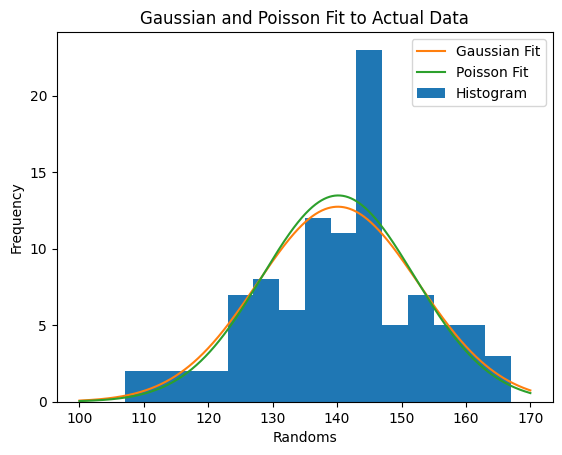

In [27]:
actualbins = np.arange(100, 170, 5)
mp = prefactor*stats.norm(loc=result[0][0], scale=np.sqrt(result[0][0])).pdf(xvals)
plt.hist(data['actual'], bins=15)
plt.plot(xvals, myGauss, label=r'$G(x | \mu=6, \sigma=1)$')
plt.plot(xvals, mp, label=r'$P(x | \lambda=6)$')
plt.legend(['Gaussian Fit', 'Poisson Fit', 'Histogram'])
plt.title('Gaussian and Poisson Fit to Actual Data')
plt.xlabel('Randoms')
plt.ylabel('Frequency')

In [28]:
hist[0]

array([0.005 , 0.005 , 0.005 , 0.005 , 0.0175, 0.02  , 0.015 , 0.03  ,
       0.0275, 0.0575, 0.0125, 0.0175, 0.0125, 0.0125, 0.0075])

In [29]:
stat = pd.DataFrame()
stat['sp_diff'] = data['sp'] - data['actual']
stat['dw_diff'] = data['dw'] - data['actual']
stat['sr_diff'] = data['sr'] - data['actual']

Text(0, 0.5, 'Frequency')

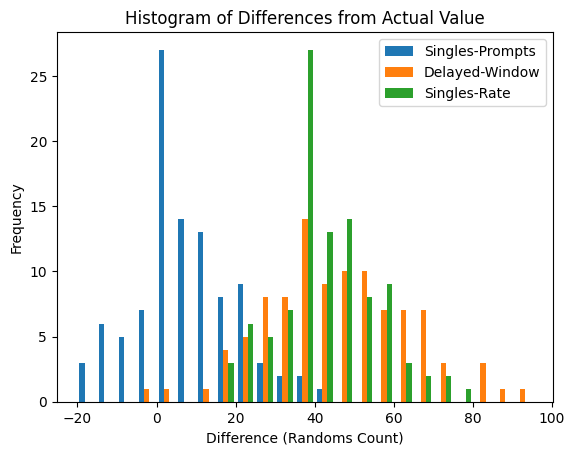

In [36]:
diffbins = np.arange(-20, 100, 5)
plt.hist(stat, bins=diffbins)
plt.legend(['Singles-Prompts', 'Delayed-Window', 'Singles-Rate'])
plt.title('Histogram of Differences from Actual Value')
plt.xlabel('Difference (Randoms Count)')
plt.ylabel('Frequency')

In [31]:
print(round(np.mean(stat['sp_diff']), 2), round(np.std(stat['sp_diff']), 2))
print(round(np.mean(stat['dw_diff']), 2), round(np.std(stat['dw_diff']), 2))
print(round(np.mean(stat['sr_diff']), 2), round(np.std(stat['sr_diff']), 2))

7.56 12.56
45.13 18.04
42.74 12.54


In [32]:
stat2 = stat.copy()

In [33]:
stat2 = stat2 / data['actual'].std()

Text(0, 0.5, 'Frequency')

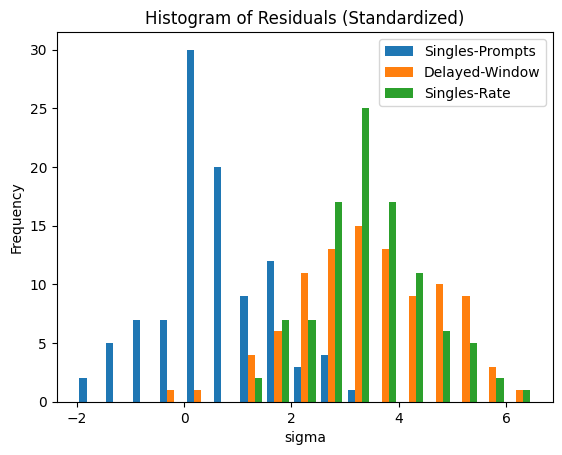

In [48]:
stddiffbins = np.arange(-2, 7, 0.5)
plt.hist(stat2, bins=stddiffbins)
plt.legend(['Singles-Prompts', 'Delayed-Window', 'Singles-Rate'])
plt.title('Histogram of Residuals (Standardized)')
plt.xlabel('sigma')
plt.ylabel('Frequency')